In [17]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following object is masked from ‘package:tidyr’:

    matches




ERROR: Error: package or namespace load failed for ‘tidymodels’ in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace ‘tidyr’ 1.1.3 is already loaded, but >= 1.1.4 is required


In [18]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv"
pollution <- read_csv(url)
pollution[is.na(pollution)] <- 0
head(pollution)


── Column specification ────────────────────────────────────────────────────────
cols(
  No = col_double(),
  year = col_double(),
  month = col_double(),
  day = col_double(),
  hour = col_double(),
  pm2.5 = col_double(),
  DEWP = col_double(),
  TEMP = col_double(),
  PRES = col_double(),
  cbwd = col_character(),
  Iws = col_double(),
  Is = col_double(),
  Ir = col_double()
)




No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,2010,1,1,0,0,-21,-11,1021,NW,1.79,0,0
2,2010,1,1,1,0,-21,-12,1020,NW,4.92,0,0
3,2010,1,1,2,0,-21,-11,1019,NW,6.71,0,0
4,2010,1,1,3,0,-21,-14,1019,NW,9.84,0,0
5,2010,1,1,4,0,-20,-12,1018,NW,12.97,0,0
6,2010,1,1,5,0,-19,-10,1017,NW,16.10,0,0


In [28]:
pollution_split <- initial_split(pollution, prop=3/4, strata = pm2.5)
pollution_training <- training(pollution_split)
pollution_testing <- testing(pollution_split)
pollute_avg <- pollution_training %>%
     select(year,month,day,hour,pm2.5,DEWP,TEMP,Iws) %>%
     group_by(year,month) %>%
     summarise(pm2.5_avg = mean(pm2.5, na.rm = TRUE),TEMP_avg = mean(TEMP, na.rm = TRUE),Iws_avg = mean(Iws, na.rm = TRUE))

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.



year,month,pm2.5_avg,TEMP_avg,Iws_avg
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2010,1,78.39138,-6.1637931,42.931172
2010,2,95.32735,-1.9301397,13.465928
2010,3,89.35689,3.2932862,23.432633
2010,4,79.35647,10.7373358,57.735591
2010,5,85.38869,20.8215548,20.105353
2010,6,86.78850,24.4916512,10.006178
2010,7,122.23941,27.6629834,14.109374
2010,8,87.80496,25.6560284,17.631525
2010,9,79.60721,20.1495495,14.051261


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



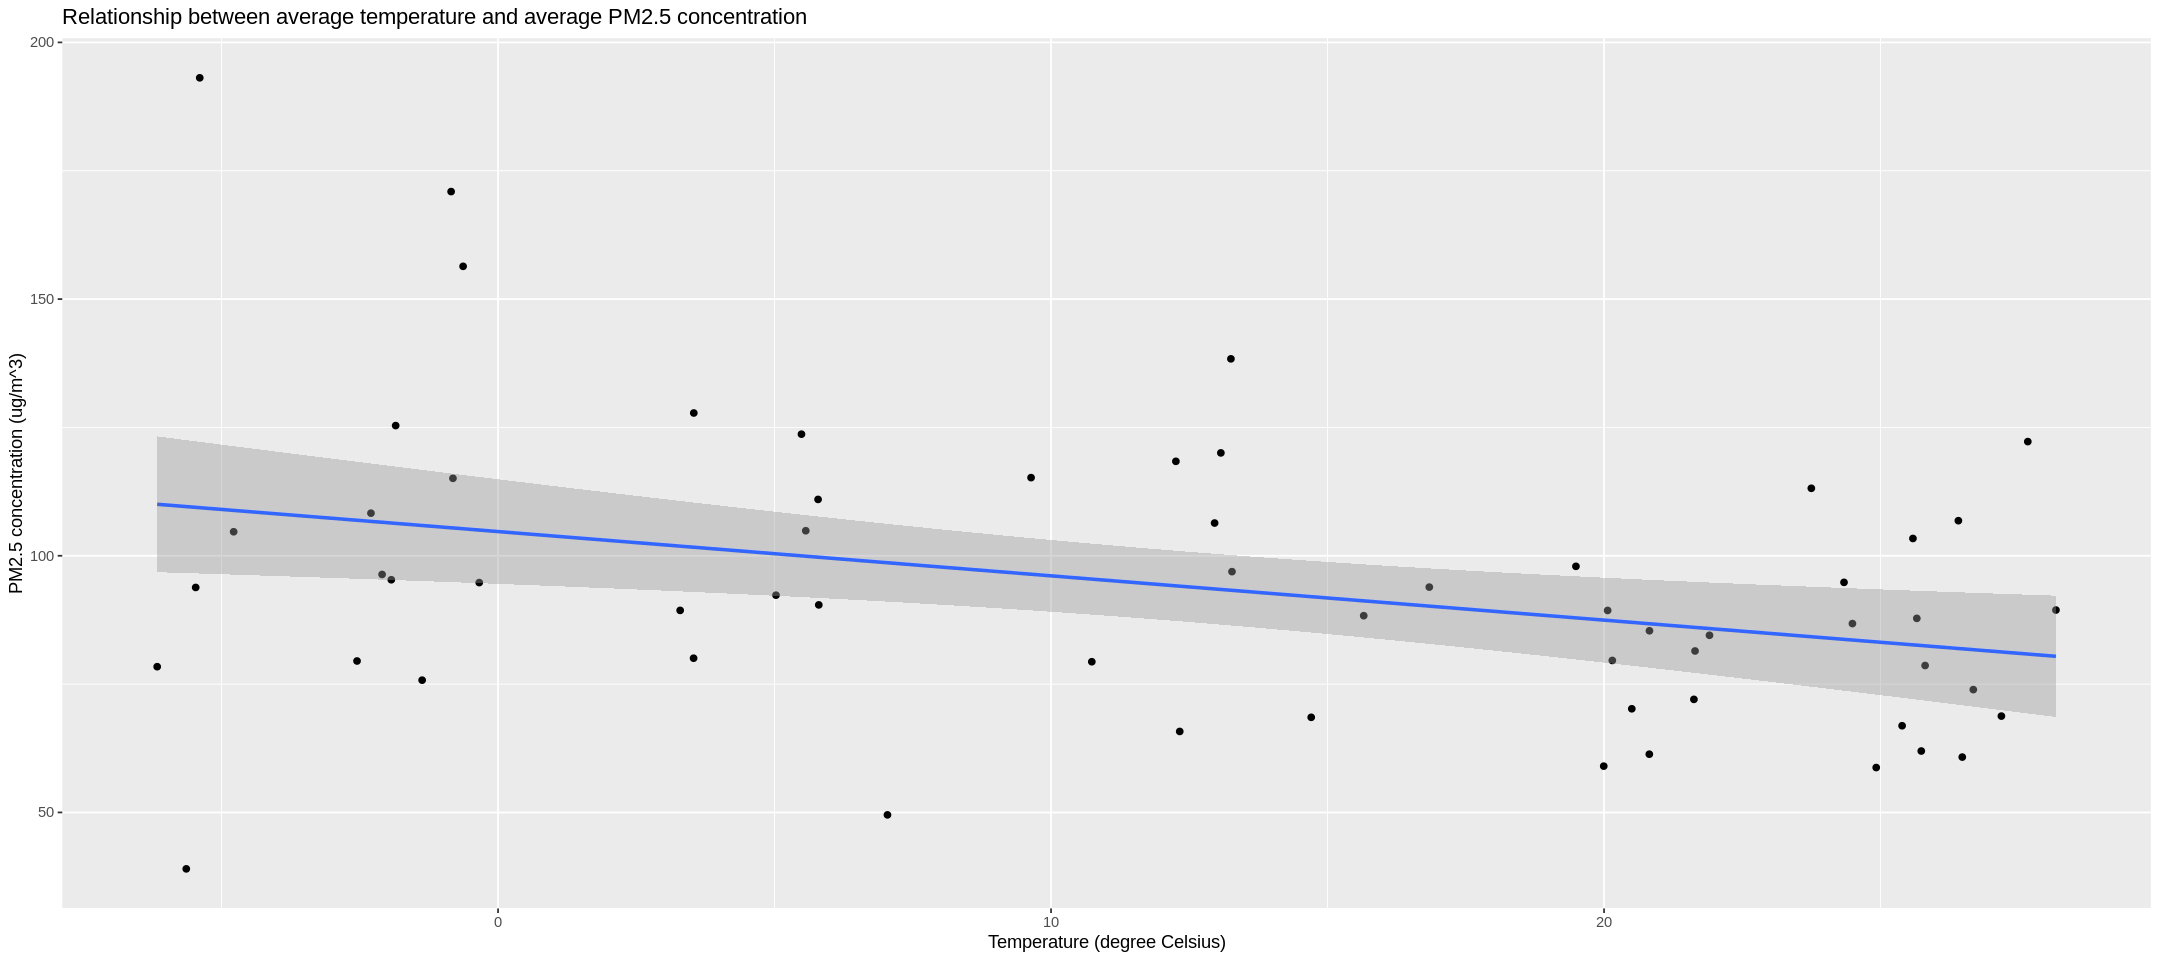

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



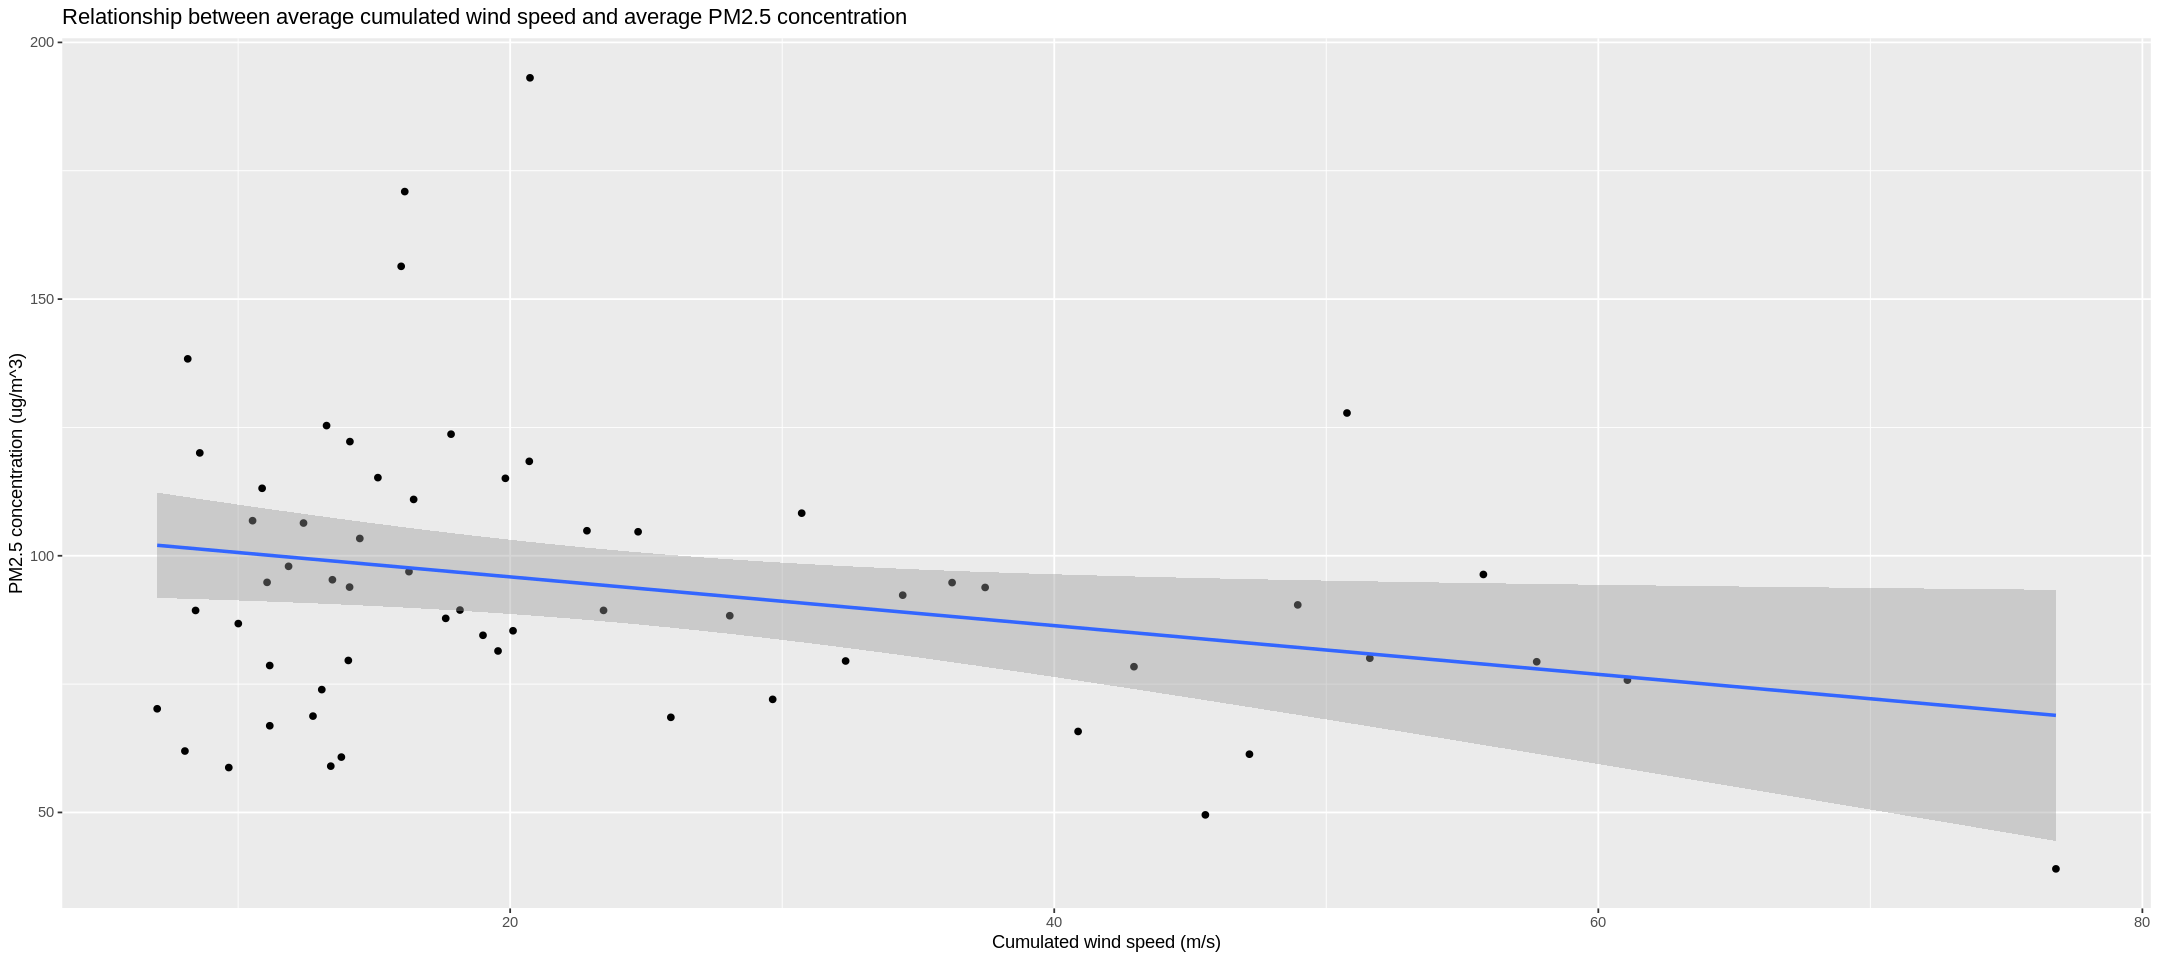

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



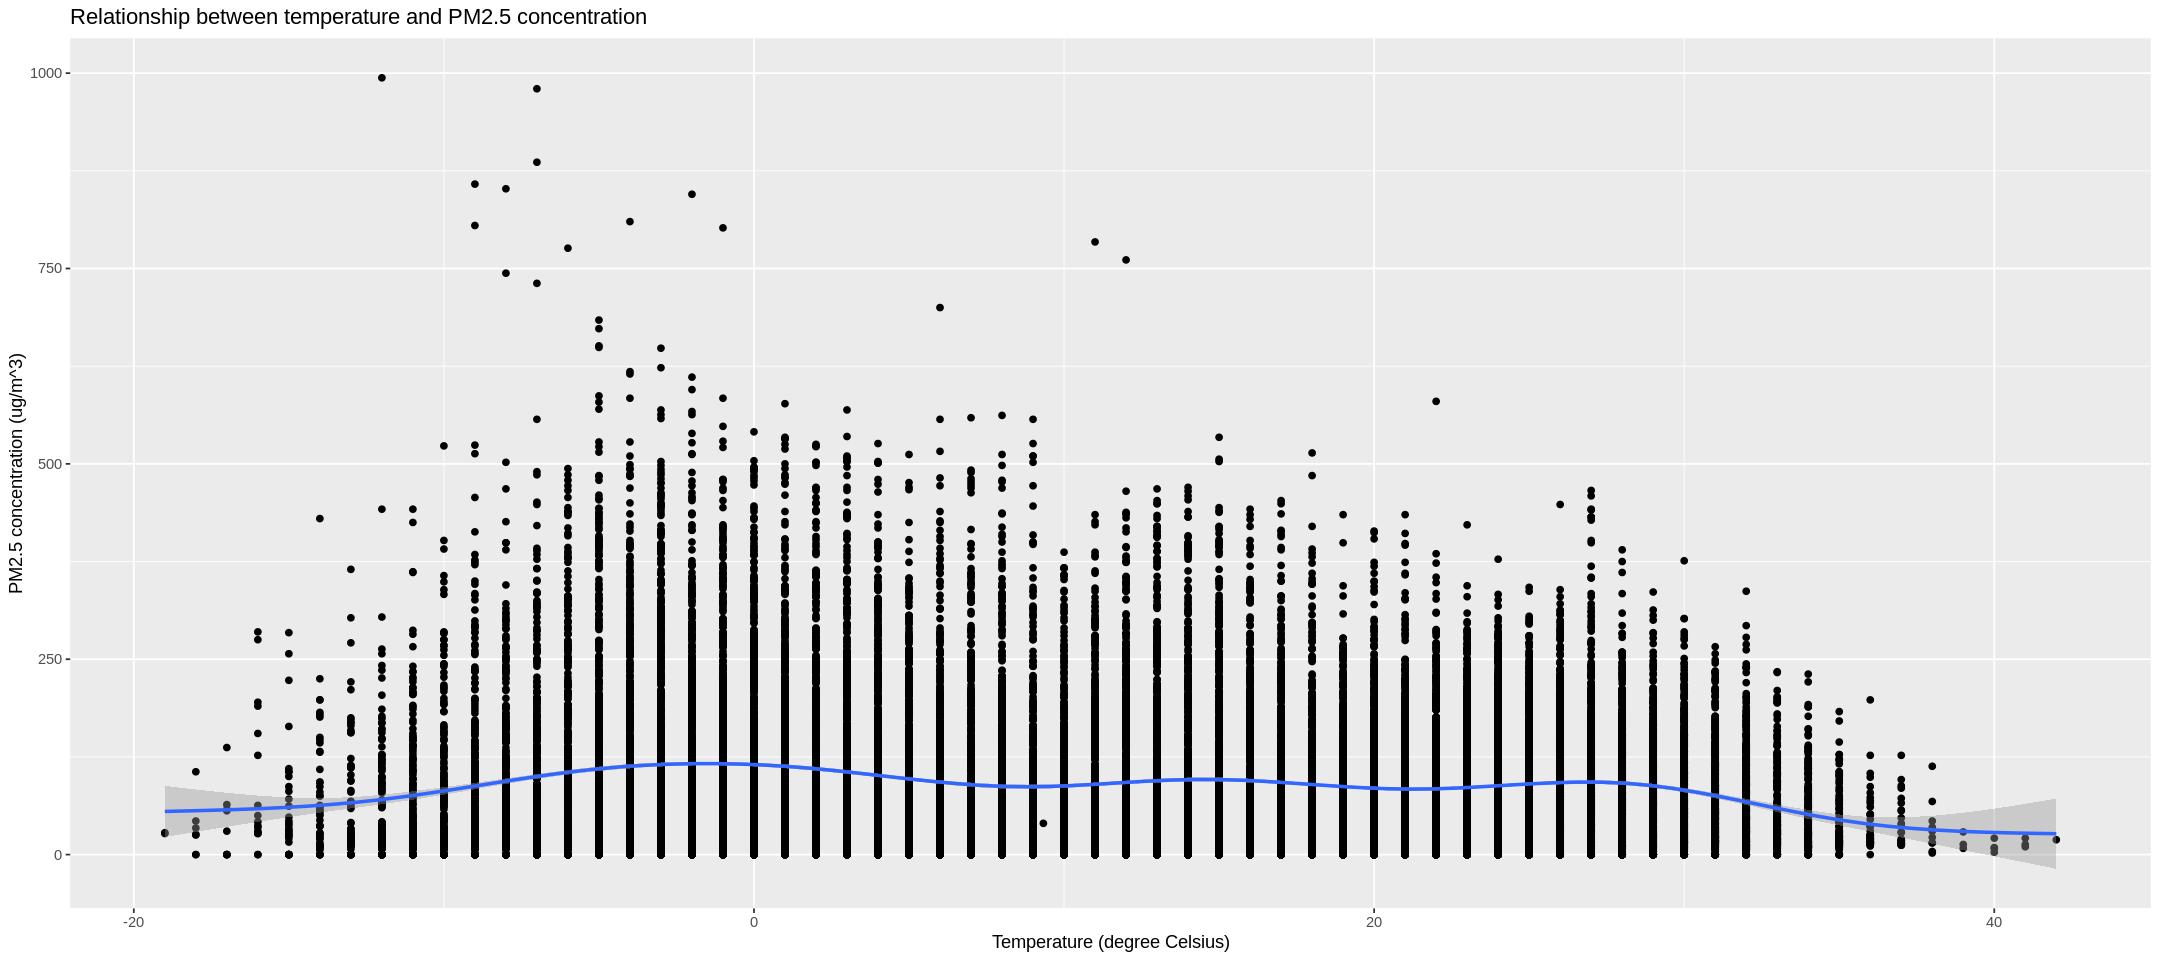

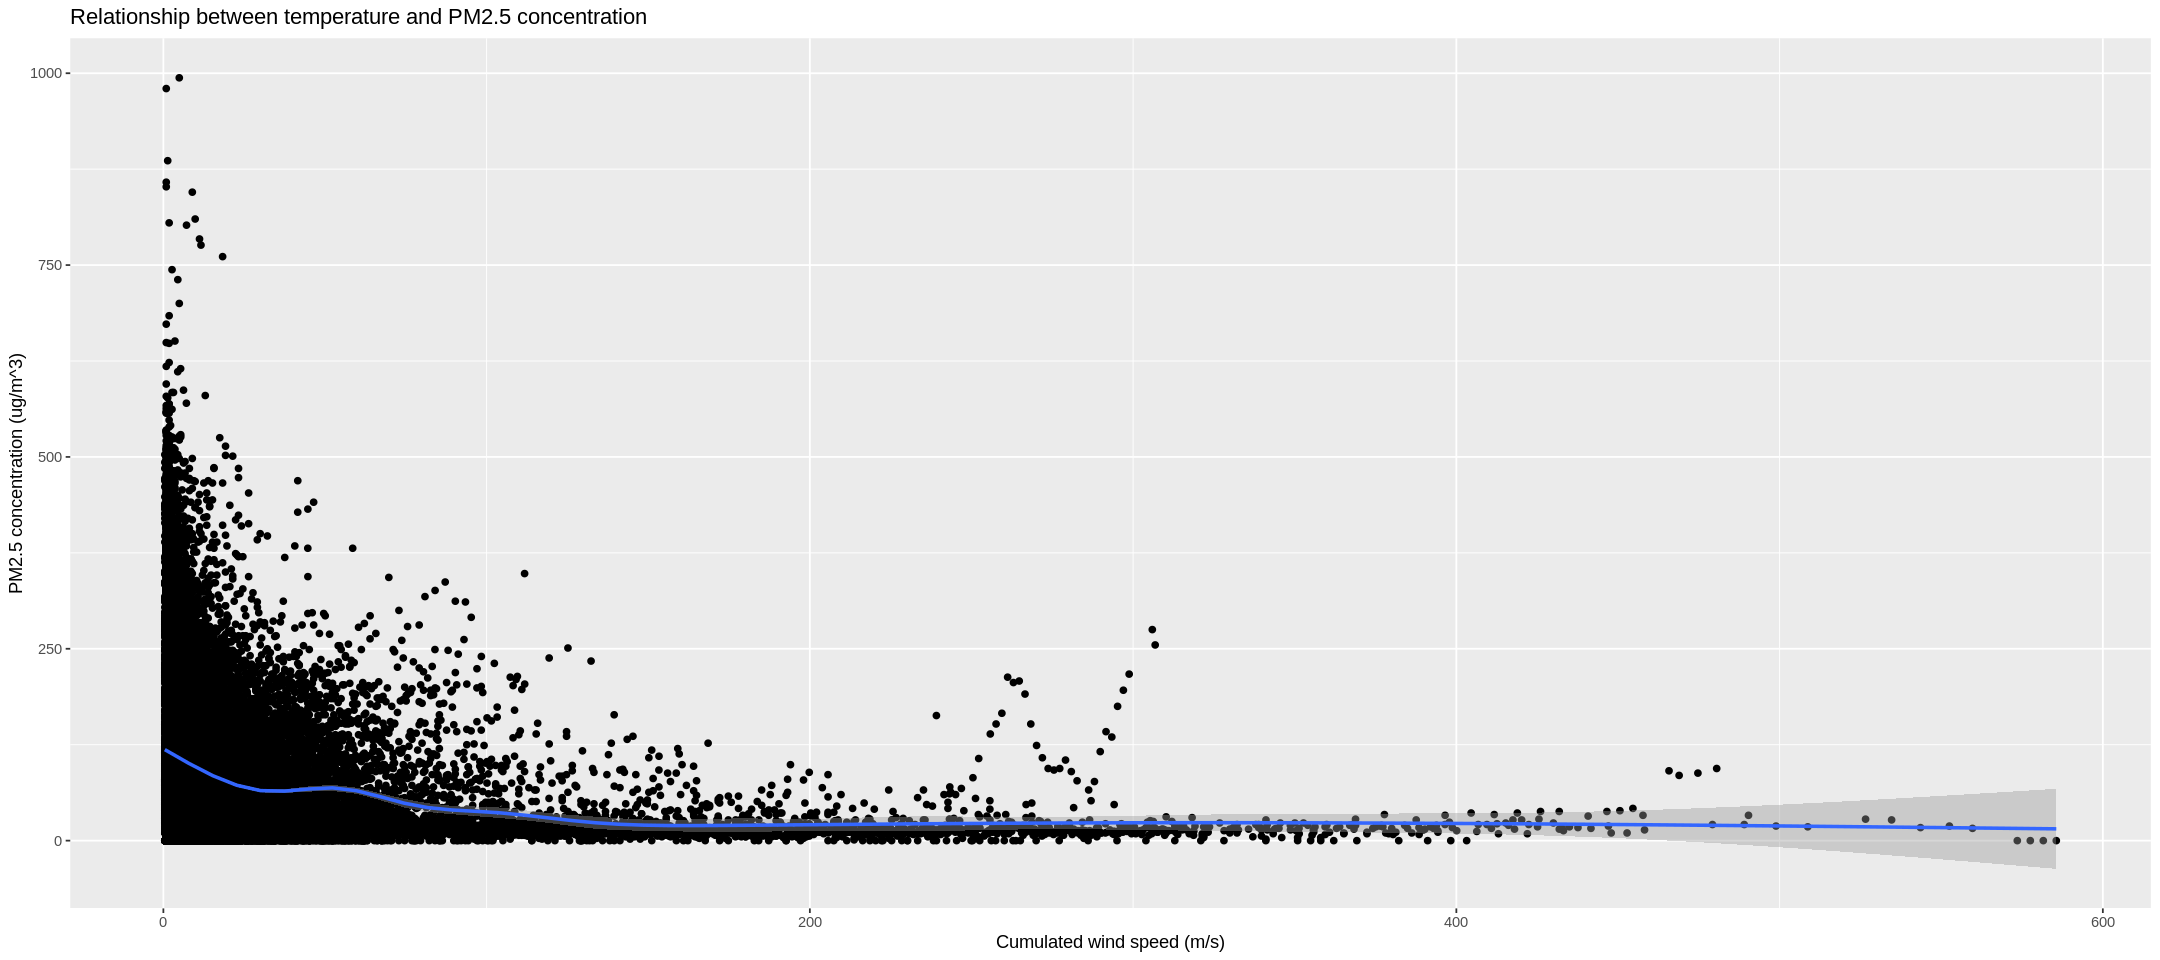

In [96]:
TEMP_pm2.5_avg_plot <- ggplot(pollute_avg, aes(x=TEMP_avg,y=pm2.5_avg)) +
geom_point() +
geom_smooth(method="lm") +
ggtitle("Relationship between average temperature and average PM2.5 concentration") +
labs(x="Temperature (degree Celsius)",y="PM2.5 concentration (ug/m^3)")
TEMP_pm2.5_avg_plot
Iws_pm2.5_avg_plot <- ggplot(pollute_avg, aes(x=Iws_avg,y=pm2.5_avg)) +
geom_point() +
geom_smooth(method="lm") +
labs(x="Cumulated wind speed (m/s)",y="PM2.5 concentration (ug/m^3)") +
ggtitle("Relationship between average cumulated wind speed and average PM2.5 concentration")
Iws_pm2.5_avg_plot
TEMP_pm2.5_total_plot <- ggplot(pollution_training, aes(x=TEMP,y=pm2.5)) +
geom_point() +
geom_smooth() +
ggtitle("Relationship between temperature and PM2.5 concentration") +
labs(x="Temperature (degree Celsius)",y="PM2.5 concentration (ug/m^3)")
TEMP_pm2.5_total_plot
Iws_pm2.5_total_plot <- ggplot(pollution_training, aes(x=Iws,y=pm2.5)) +
geom_point() +
geom_smooth() +
ggtitle("Relationship between temperature and PM2.5 concentration") +
labs(x="Cumulated wind speed (m/s)",y="PM2.5 concentration (ug/m^3)")
Iws_pm2.5_total_plot

`summarise()` has grouped output by 'year', 'month'. You can override using the `.groups` argument.



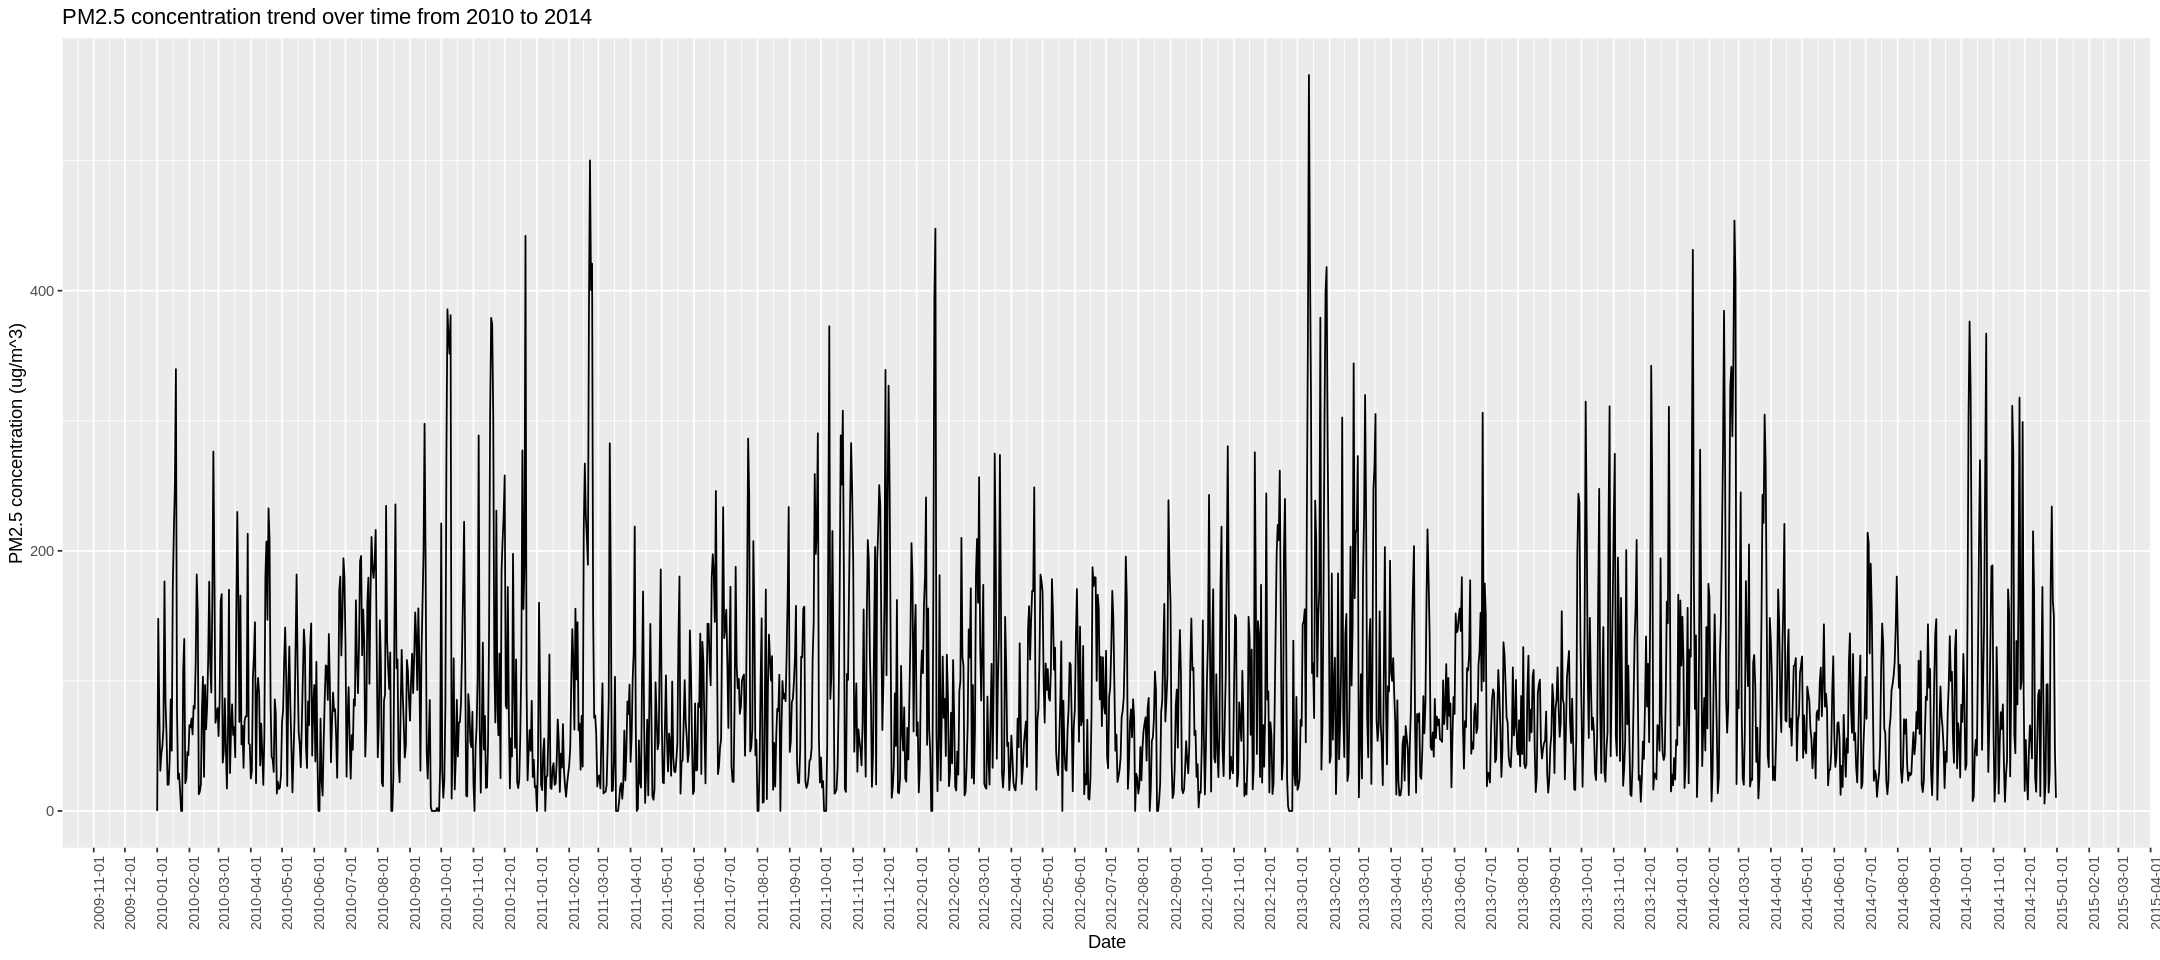

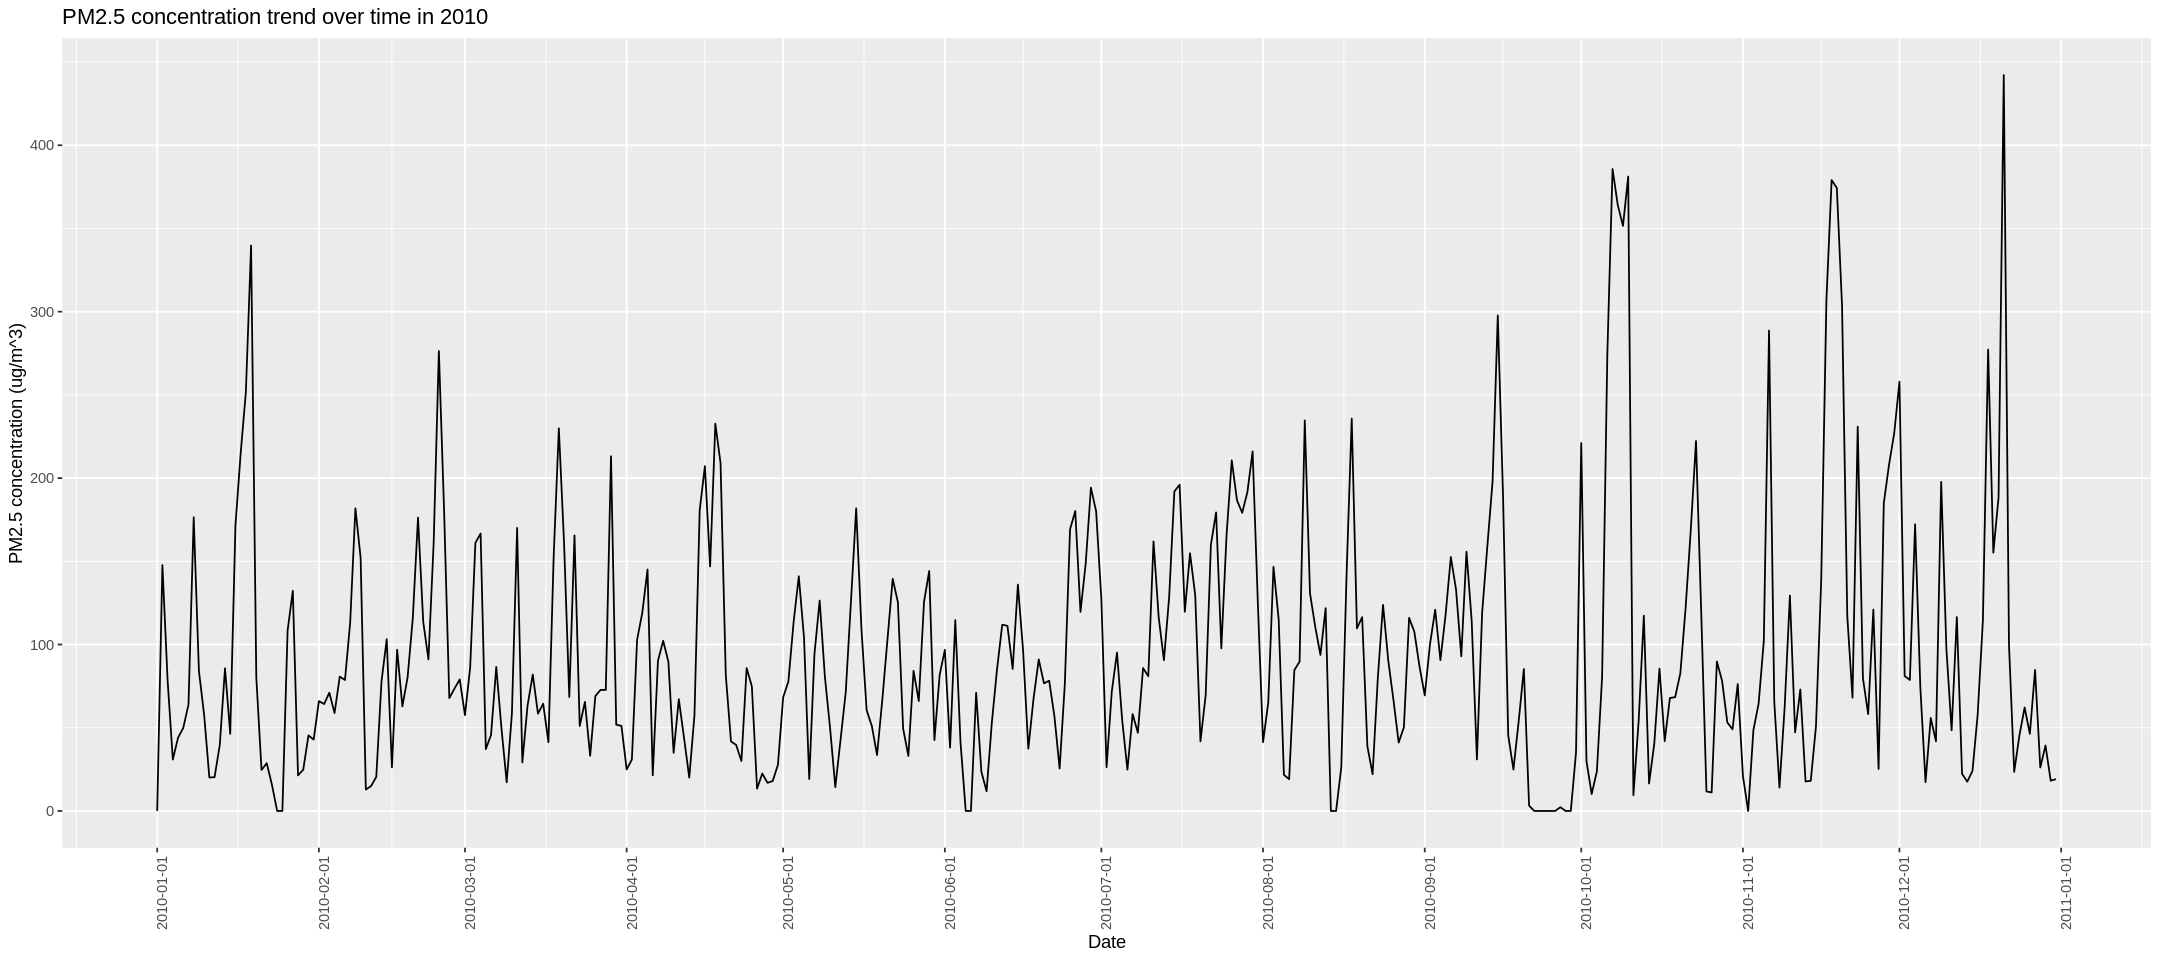

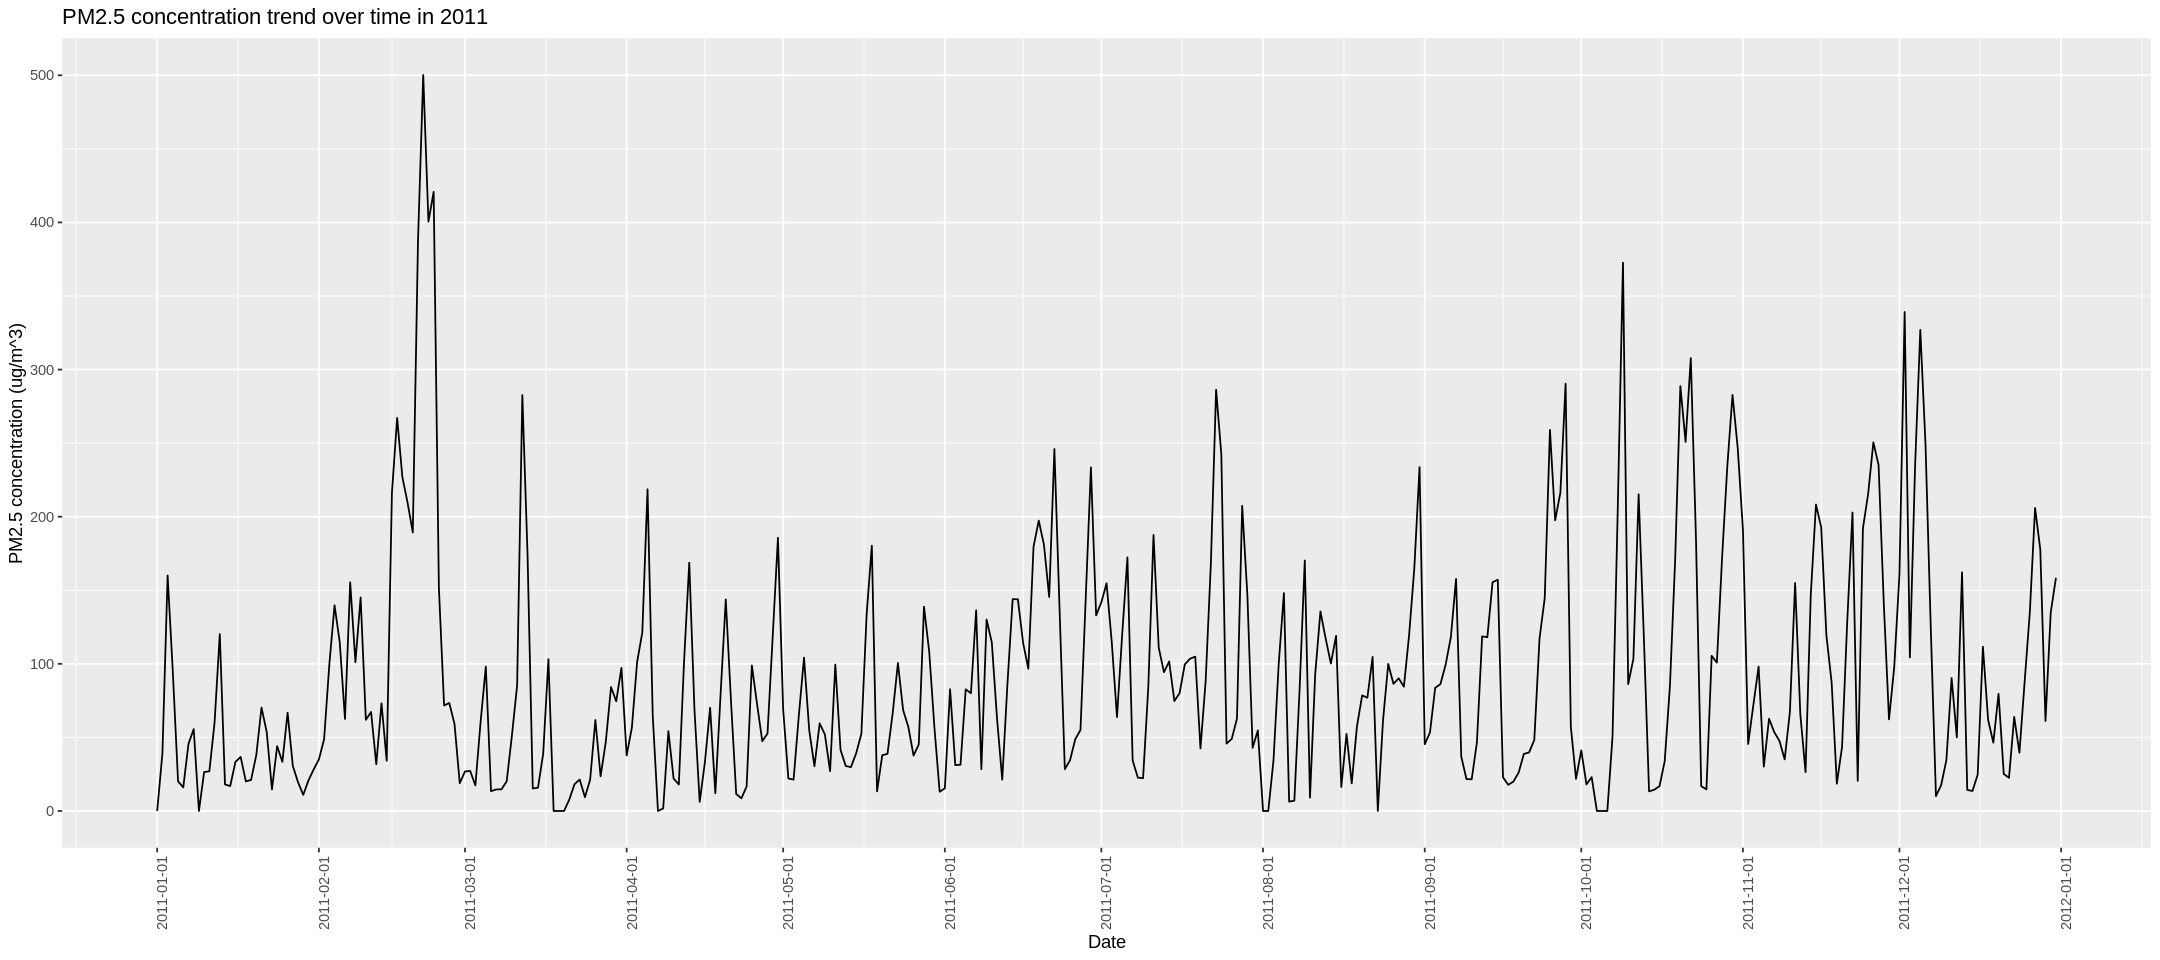

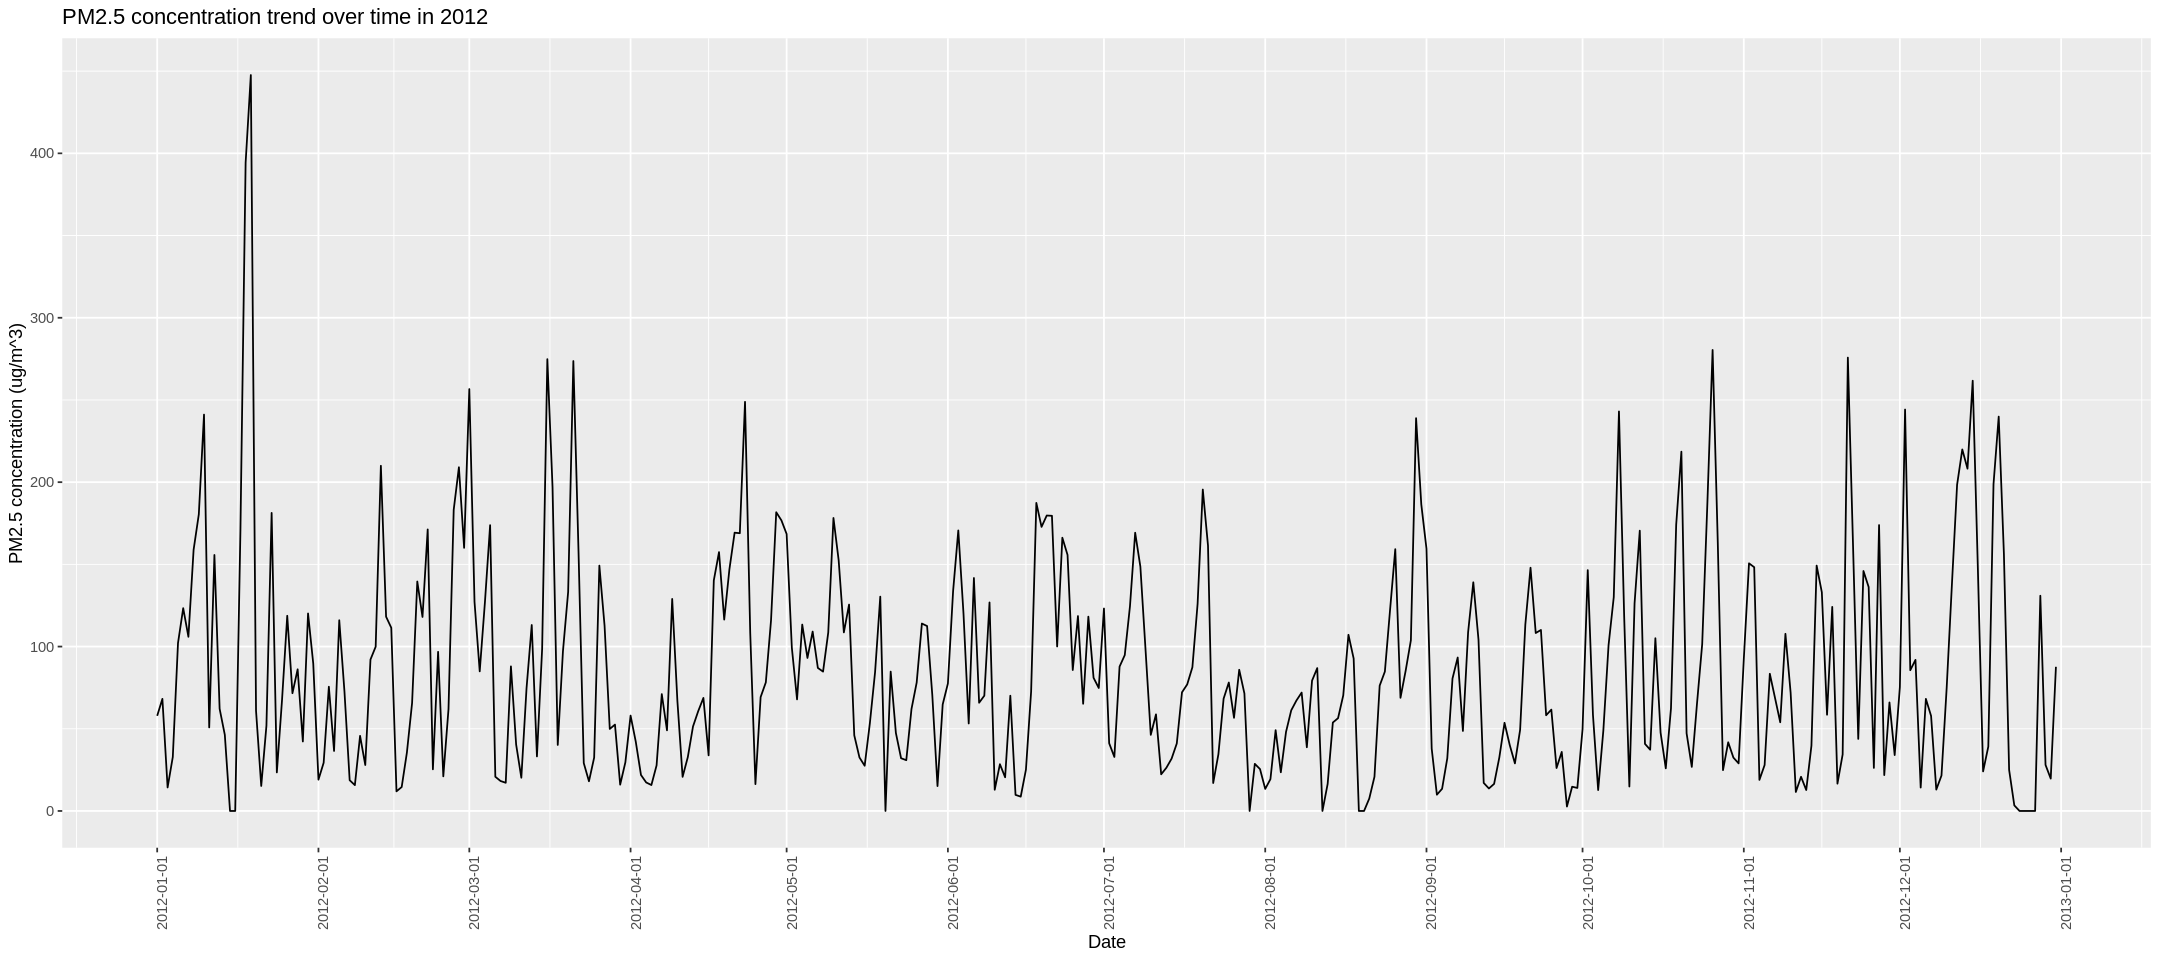

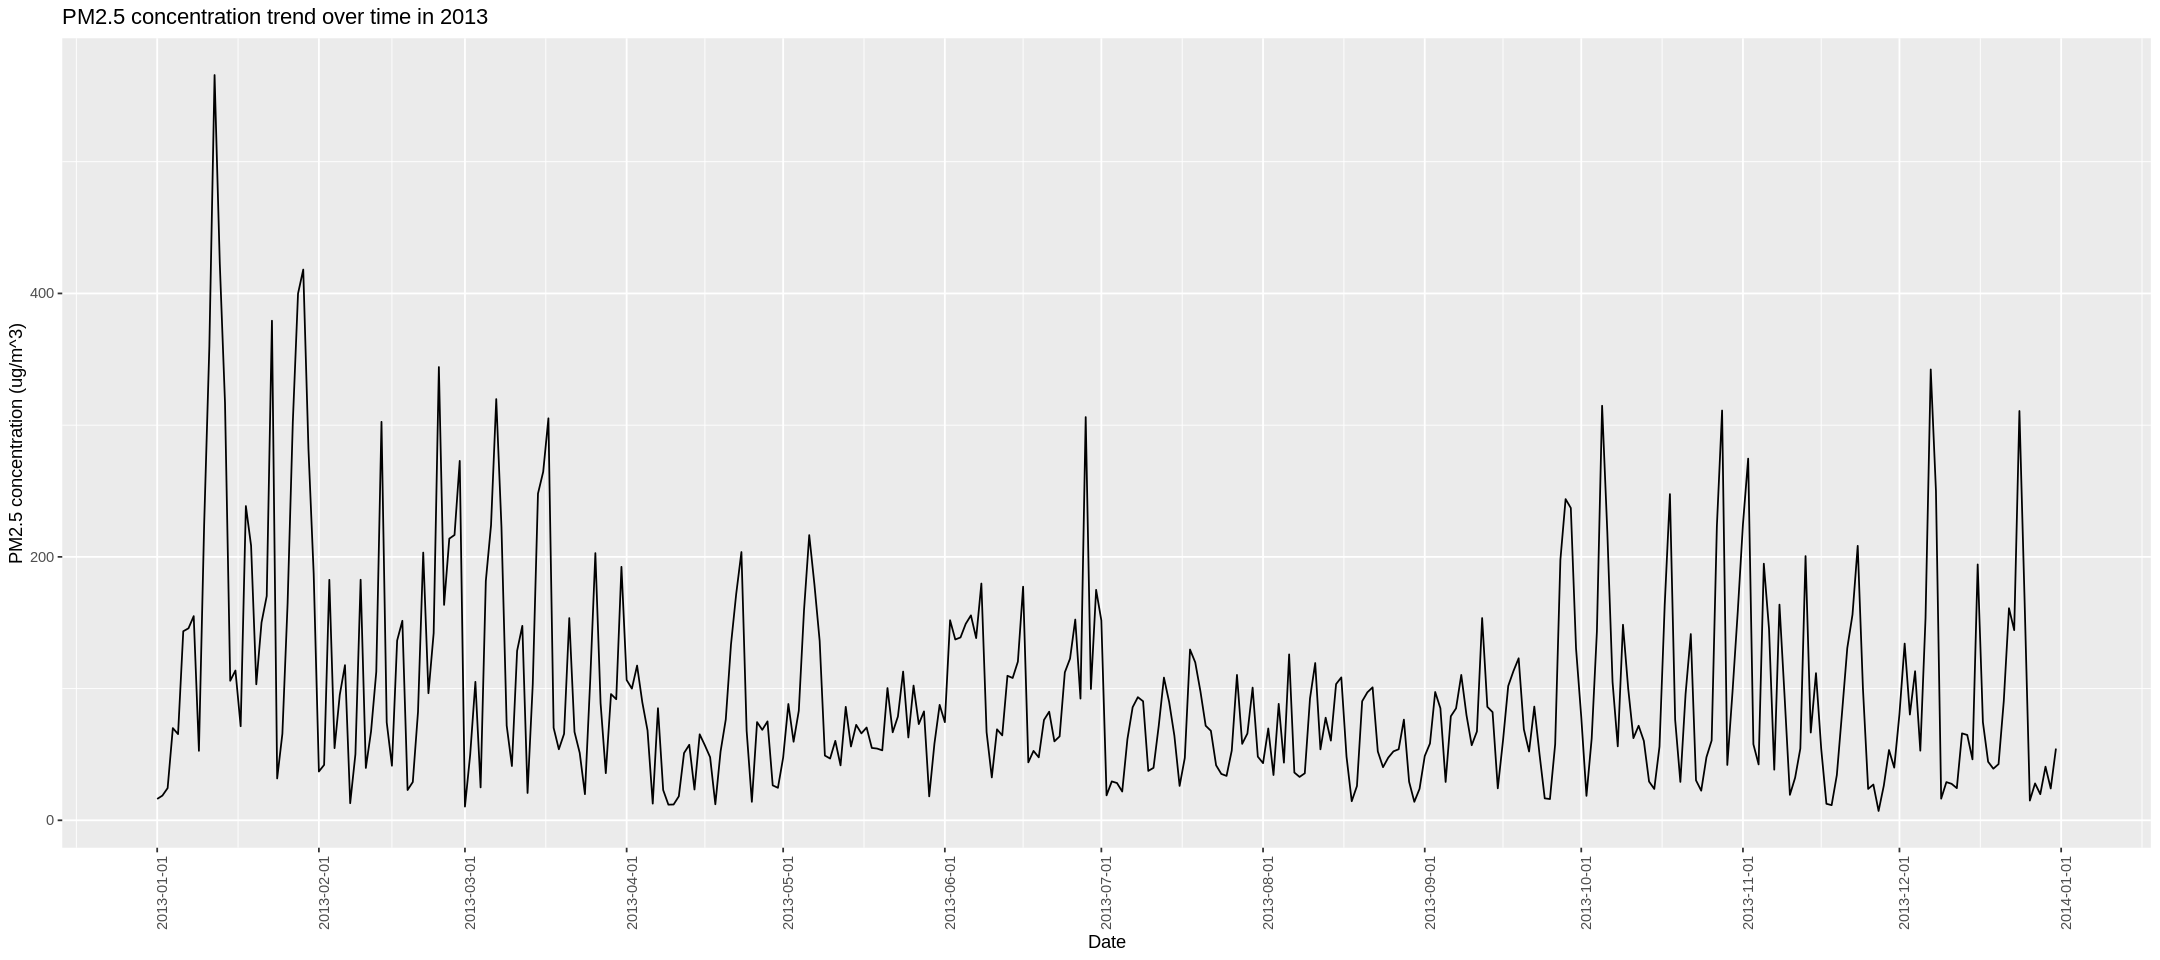

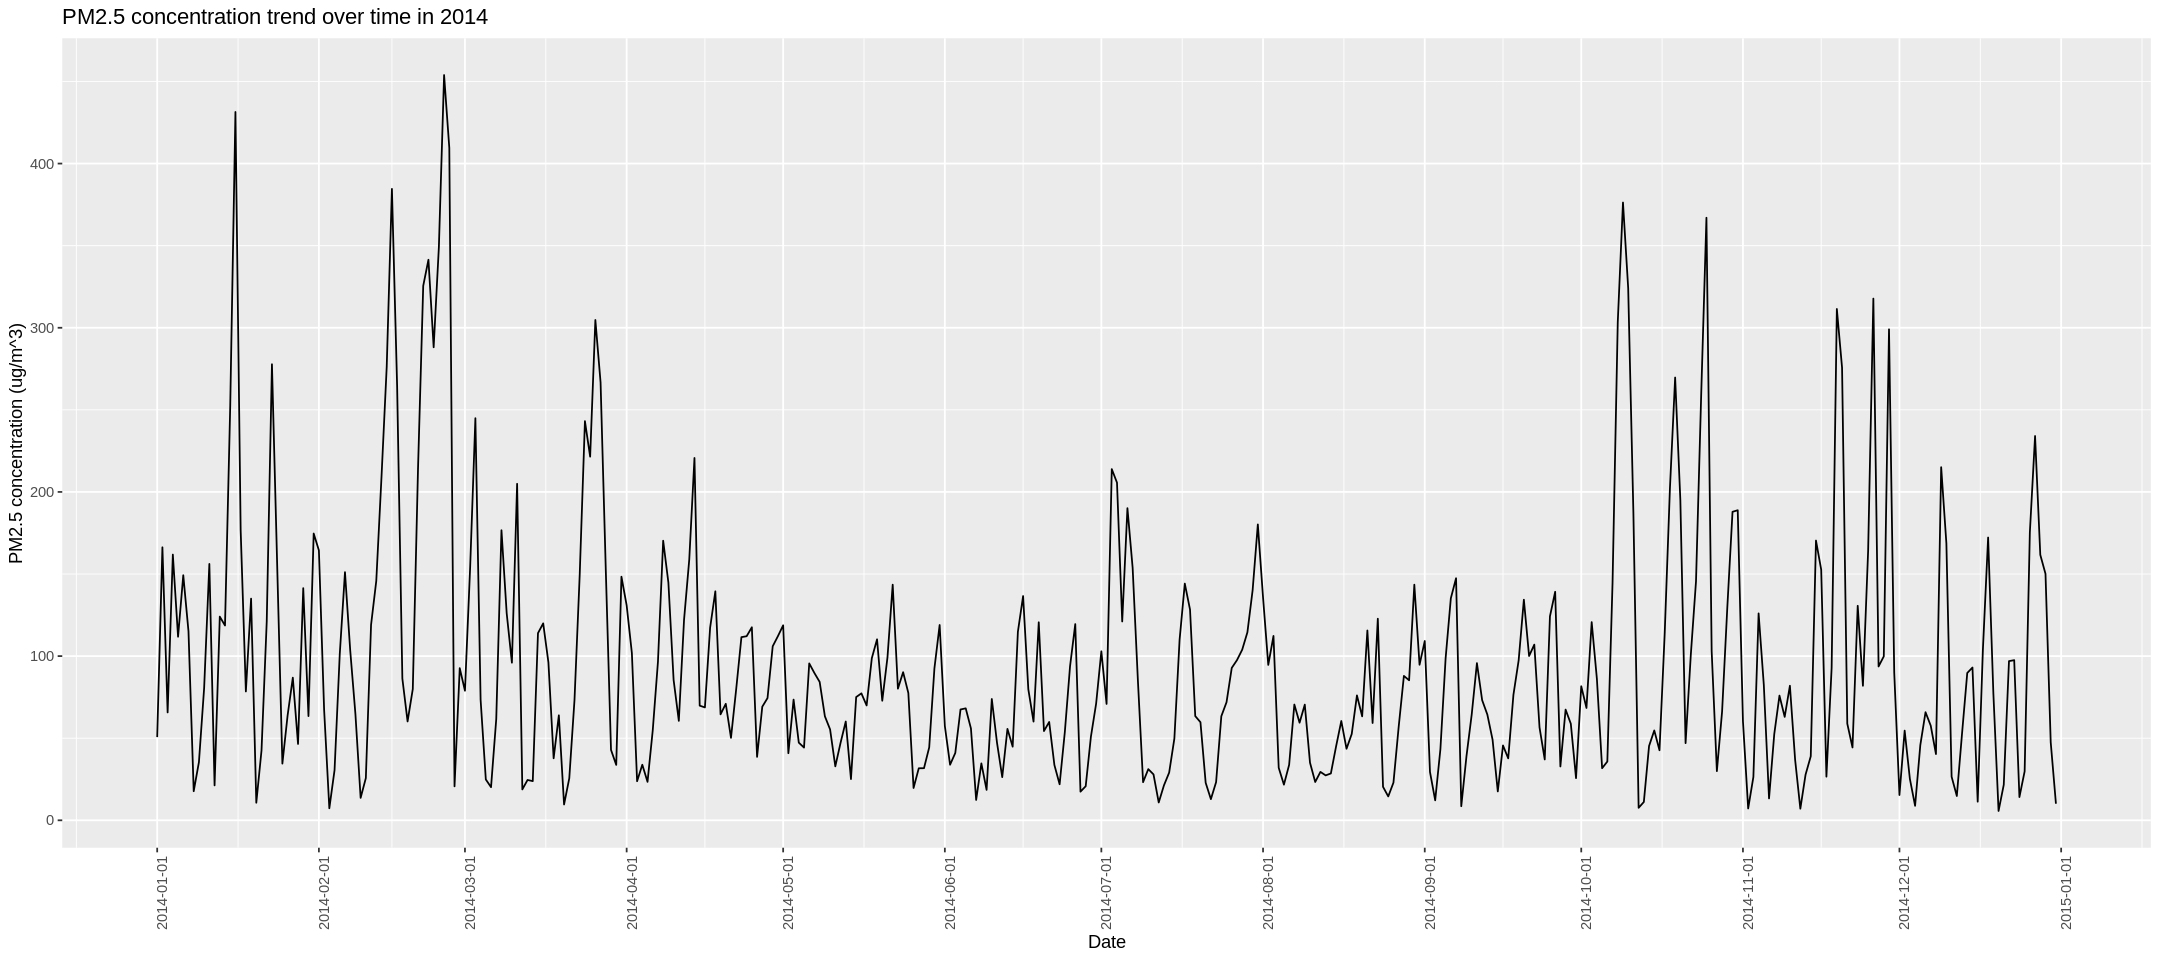

In [95]:
options(repr.plot.width = 18, repr.plot.height = 8)
pm2.5_data <- pollution_training %>%
    select(year,month,day,pm2.5) %>%
    group_by(year,month,day) %>%
    summarise(pm2.5_avg = mean(pm2.5, na.rm = TRUE))
pm2.5_data$Date<-as.Date(with(pm2.5_data,paste(year,month,day,sep="-")),"%Y-%m-%d")

pm2.5_time_total_plot <- ggplot(pm2.5_data, aes(x = Date, y = pm2.5_avg)) + 
     geom_line() +
     xlab("Date") +
     ylab("PM2.5 concentration (ug/m^3)") + 
    scale_x_date(date_breaks = "1 month") +
    ggtitle("PM2.5 concentration trend over time from 2010 to 2014") +
     theme(axis.text.x = element_text(angle = 90, hjust = 1)) 
pm2.5_time_total_plot

pm2.5_time_2010_plot <- pm2.5_data %>%
filter(year == 2010) %>%
ggplot(aes(x = Date, y = pm2.5_avg)) + 
     geom_line() +
     xlab("Date") +
     ylab("PM2.5 concentration (ug/m^3)") + 
    scale_x_date(date_breaks = "1 month") + 
    ggtitle("PM2.5 concentration trend over time in 2010") +
     theme(axis.text.x = element_text(angle = 90, hjust = 1)) 
pm2.5_time_2010_plot

pm2.5_time_2011_plot <- pm2.5_data %>%
filter(year == 2011) %>%
ggplot(aes(x = Date, y = pm2.5_avg)) + 
     geom_line() +
     xlab("Date") +
     ylab("PM2.5 concentration (ug/m^3)") + 
    scale_x_date(date_breaks = "1 month") + 
    ggtitle("PM2.5 concentration trend over time in 2011") +
     theme(axis.text.x = element_text(angle = 90, hjust = 1)) 
pm2.5_time_2011_plot

pm2.5_time_2012_plot <- pm2.5_data %>%
filter(year == 2012) %>%
ggplot(aes(x = Date, y = pm2.5_avg)) + 
     geom_line() +
     xlab("Date") +
     ylab("PM2.5 concentration (ug/m^3)") + 
    scale_x_date(date_breaks = "1 month") +
    ggtitle("PM2.5 concentration trend over time in 2012") +
     theme(axis.text.x = element_text(angle = 90, hjust = 1)) 
pm2.5_time_2012_plot

pm2.5_time_2013_plot <- pm2.5_data %>%
filter(year == 2013) %>%
ggplot(aes(x = Date, y = pm2.5_avg)) + 
     geom_line() +
     xlab("Date") +
     ylab("PM2.5 concentration (ug/m^3)") + 
     ggtitle("PM2.5 concentration trend over time in 2013") +
    scale_x_date(date_breaks = "1 month") + # labels every month
     theme(axis.text.x = element_text(angle = 90, hjust = 1)) 
pm2.5_time_2013_plot

pm2.5_time_2014_plot <- pm2.5_data %>%
filter(year == 2014) %>%
ggplot(aes(x = Date, y = pm2.5_avg)) + 
     geom_line() +
     xlab("Date") +
     ylab("PM2.5 concentration (ug/m^3)") + 
    scale_x_date(date_breaks = "1 month") +
    ggtitle("PM2.5 concentration trend over time in 2014") +
     theme(axis.text.x = element_text(angle = 90, hjust = 1)) 
pm2.5_time_2014_plot

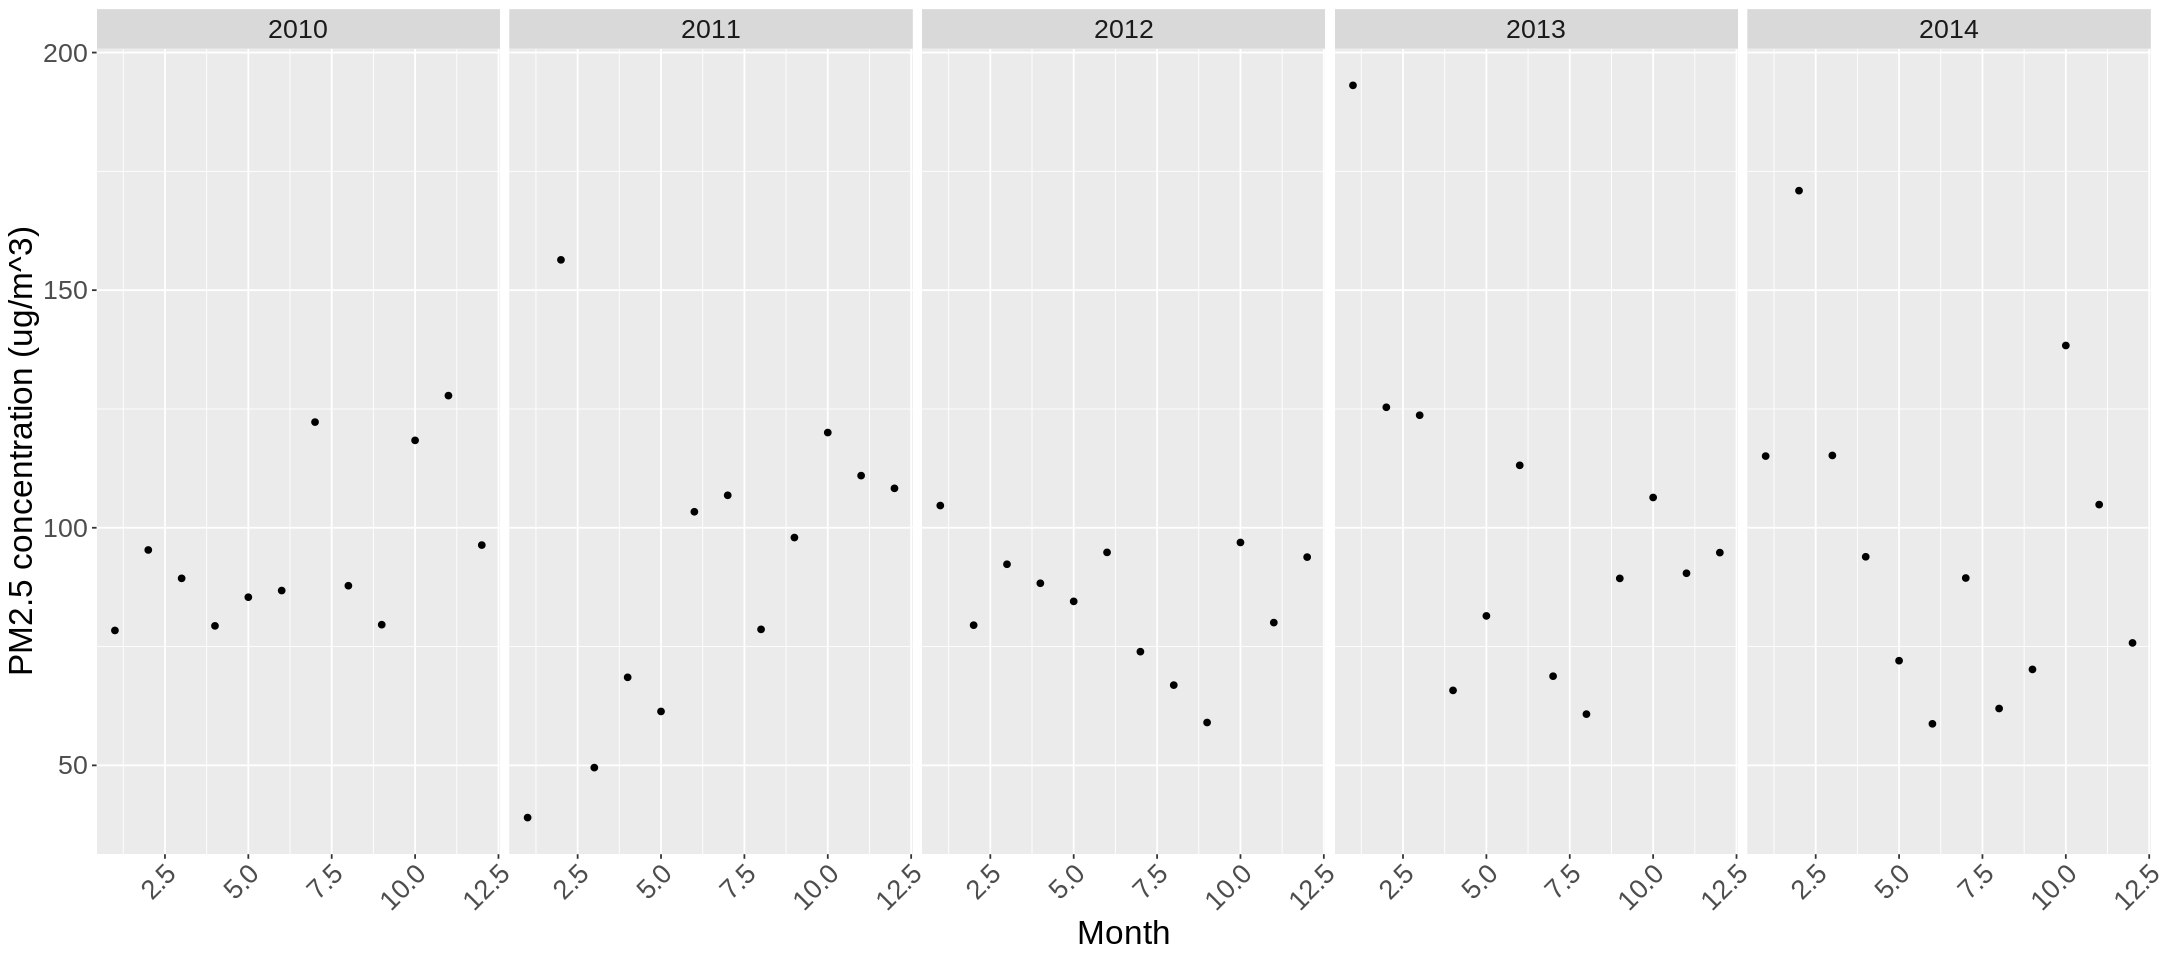

In [103]:
pm2.5_avg_plot <- pollute_avg %>%
    ggplot(aes(x = month, y = pm2.5_avg)) + 
    geom_point() +
    xlab("Month") + 
    ylab("PM2.5 concentration (ug/m^3)") +
    facet_grid(.~ year) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
         strip.text.y.left = element_text(angle = 0),
         text = element_text(size = 20))
pm2.5_avg_plot


In [99]:
pollute_avg

year,month,pm2.5_avg,TEMP_avg,Iws_avg
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2010,1,78.39138,-6.1637931,42.931172
2010,2,95.32735,-1.9301397,13.465928
2010,3,89.35689,3.2932862,23.432633
2010,4,79.35647,10.7373358,57.735591
2010,5,85.38869,20.8215548,20.105353
2010,6,86.78850,24.4916512,10.006178
2010,7,122.23941,27.6629834,14.109374
2010,8,87.80496,25.6560284,17.631525
2010,9,79.60721,20.1495495,14.051261
